In [1]:
#pip install seaborn

In [2]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
from tracking.models import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Useful Links
- [Queryset Docs](https://docs.djangoproject.com/en/4.1/ref/models/querysets/)

In [3]:
c = Contest.objects.first()
c

<Contest: Contest(2, Big Juicy & The Boys Do A Weight Loss, 2022-08-17 - 2022-11-24, finished: False)>

In [4]:
for check_in in c.check_ins.order_by('starting').all():
    display(check_in)

<CheckIn: CheckIn(17, 2022-08-17, started: True)>

<CheckIn: CheckIn(18, 2022-08-24, started: True)>

<CheckIn: CheckIn(19, 2022-08-31, started: True)>

<CheckIn: CheckIn(20, 2022-09-07, started: False)>

<CheckIn: CheckIn(21, 2022-09-14, started: False)>

<CheckIn: CheckIn(22, 2022-09-21, started: False)>

<CheckIn: CheckIn(23, 2022-09-28, started: False)>

<CheckIn: CheckIn(24, 2022-10-05, started: False)>

<CheckIn: CheckIn(25, 2022-10-12, started: False)>

<CheckIn: CheckIn(26, 2022-10-19, started: False)>

<CheckIn: CheckIn(27, 2022-10-26, started: False)>

<CheckIn: CheckIn(28, 2022-11-02, started: False)>

<CheckIn: CheckIn(29, 2022-11-09, started: False)>

<CheckIn: CheckIn(30, 2022-11-16, started: False)>

<CheckIn: CheckIn(31, 2022-11-23, started: False)>

<CheckIn: CheckIn(32, 2022-11-24, started: False)>

In [5]:
# first check_in for contest
first_check_in = c.check_ins.earliest('starting')
display(first_check_in)

for contestant_check_in in first_check_in.contestant_check_ins.all():
    display(contestant_check_in.contestant.name, contestant_check_in)


<CheckIn: CheckIn(17, 2022-08-17, started: True)>

'ericmtz'

<ContestantCheckIn: ContestantCheckIn(5, 172.4lbs, contestant_id: 3)>

'maton'

<ContestantCheckIn: ContestantCheckIn(6, 196.4lbs, contestant_id: 6)>

'Ludens'

<ContestantCheckIn: ContestantCheckIn(7, 249.4lbs, contestant_id: 7)>

'Ageeklar'

<ContestantCheckIn: ContestantCheckIn(8, 209.7lbs, contestant_id: 4)>

'dcvz'

<ContestantCheckIn: ContestantCheckIn(9, 84.0kg, contestant_id: 8)>

'Squanchy'

<ContestantCheckIn: ContestantCheckIn(17, 191.8lbs, contestant_id: 2)>

'Sand.Toast'

<ContestantCheckIn: ContestantCheckIn(18, 284.4lbs, contestant_id: 9)>

'fjjstunna'

<ContestantCheckIn: ContestantCheckIn(19, 202.8lbs, contestant_id: 5)>

In [6]:
first_check_in.contestant_check_ins.values_list('weight', flat=True)

<QuerySet [172.4, 196.4, 249.4, 209.7, 84.0, 191.8, 284.4, 202.8]>

In [7]:
# first check_in for contest
#all_check_in = contestant_check_in.objects.all()
#display(all_check_in)

#for contestant_check_in in c.check_ins.all():
    #display(contestant_check_in.contestant.name, contestant_check_in)

In [8]:
pandas_all_data = []

for contestant_check_in in ContestantCheckIn.objects.all():
    pandas_all_data.append({
        'weight': contestant_check_in.weight,
        'units': contestant_check_in.units,
        'name': contestant_check_in.contestant.name,
        'weigh_in': contestant_check_in.check_in.starting
    })

pandas_all_data

[{'weight': 172.4,
  'units': 'lbs',
  'name': 'ericmtz',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 196.4,
  'units': 'lbs',
  'name': 'maton',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 249.4,
  'units': 'lbs',
  'name': 'Ludens',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 209.7,
  'units': 'lbs',
  'name': 'Ageeklar',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 84.0,
  'units': 'kg',
  'name': 'dcvz',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 191.0,
  'units': 'lbs',
  'name': 'maton',
  'weigh_in': datetime.date(2022, 8, 24)},
 {'weight': 83.4,
  'units': 'kg',
  'name': 'dcvz',
  'weigh_in': datetime.date(2022, 8, 24)},
 {'weight': 197.2,
  'units': 'lbs',
  'name': 'fjjstunna',
  'weigh_in': datetime.date(2022, 8, 24)},
 {'weight': 244.8,
  'units': 'lbs',
  'name': 'Ludens',
  'weigh_in': datetime.date(2022, 8, 24)},
 {'weight': 189.2,
  'units': 'lbs',
  'name': 'Squanchy',
  'weigh_in': datetime.date(2022, 8, 24)},
 {

In [9]:
pandas_raw_data = []

for contestant_check_in in first_check_in.contestant_check_ins.all():
    pandas_raw_data.append({
        'weight': contestant_check_in.weight,
        'units': contestant_check_in.units,
        'name': contestant_check_in.contestant.name,
        'weigh_in': contestant_check_in.check_in.starting
    })

pandas_raw_data

[{'weight': 172.4,
  'units': 'lbs',
  'name': 'ericmtz',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 196.4,
  'units': 'lbs',
  'name': 'maton',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 249.4,
  'units': 'lbs',
  'name': 'Ludens',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 209.7,
  'units': 'lbs',
  'name': 'Ageeklar',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 84.0,
  'units': 'kg',
  'name': 'dcvz',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 191.8,
  'units': 'lbs',
  'name': 'Squanchy',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 284.4,
  'units': 'lbs',
  'name': 'Sand.Toast',
  'weigh_in': datetime.date(2022, 8, 17)},
 {'weight': 202.8,
  'units': 'lbs',
  'name': 'fjjstunna',
  'weigh_in': datetime.date(2022, 8, 17)}]

In [10]:
#df = pd.DataFrame(pandas_raw_data)
#df

df1 = pd.DataFrame(pandas_all_data)
df1

,weight,units,name,weigh_in
0,172.4,lbs,ericmtz,2022-08-17
1,196.4,lbs,maton,2022-08-17
2,249.4,lbs,Ludens,2022-08-17
3,209.7,lbs,Ageeklar,2022-08-17
4,84.0,kg,dcvz,2022-08-17
5,191.0,lbs,maton,2022-08-24
6,83.4,kg,dcvz,2022-08-24
7,197.2,lbs,fjjstunna,2022-08-24
8,244.8,lbs,Ludens,2022-08-24
9,189.2,lbs,Squanchy,2022-08-24


In [11]:
df1['weigh_in']= df1['weigh_in'].astype('datetime64')
df1['weigh_in'] = df1['weigh_in'].dt.date

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    21 non-null     float64
 1   units     21 non-null     object 
 2   name      21 non-null     object 
 3   weigh_in  21 non-null     object 
dtypes: float64(1), object(3)
memory usage: 800.0+ bytes


In [13]:
df1.sort_values(by='weigh_in', ascending=True)

,weight,units,name,weigh_in
0,172.4,lbs,ericmtz,2022-08-17
1,196.4,lbs,maton,2022-08-17
2,249.4,lbs,Ludens,2022-08-17
3,209.7,lbs,Ageeklar,2022-08-17
4,84.0,kg,dcvz,2022-08-17
14,202.8,lbs,fjjstunna,2022-08-17
13,284.4,lbs,Sand.Toast,2022-08-17
12,191.8,lbs,Squanchy,2022-08-17
11,206.7,lbs,Ageeklar,2022-08-24
10,181.4,lbs,ericmtz,2022-08-24


In [14]:
kg_n = df1.loc[df1['units'] == 'kg']
kg_n


,weight,units,name,weigh_in
4,84.0,kg,dcvz,2022-08-17
6,83.4,kg,dcvz,2022-08-24
18,83.5,kg,dcvz,2022-08-31


In [15]:

def normalize_weight(row):
    if row['units'] == 'kg':
        return row['weight'] * 2.205
    else:
        return row['weight']
df1['weight_n'] = df1.apply(normalize_weight, axis=1)
df1
#df1.loc[df1.units == 'kg'].apply(lambda x: x.weight_n = x.weight * 2.205, axis=1)
#df1.loc[df1.units == 'kg']
#if df1.loc[df1['units'] == 'kg']:
#    df1['weight_n'] = df1['weight'] * 2.205
#else:
#    df1['weight_n'] = df1['weight']


,weight,units,name,weigh_in,weight_n
0,172.4,lbs,ericmtz,2022-08-17,172.4000
1,196.4,lbs,maton,2022-08-17,196.4000
2,249.4,lbs,Ludens,2022-08-17,249.4000
3,209.7,lbs,Ageeklar,2022-08-17,209.7000
4,84.0,kg,dcvz,2022-08-17,185.2200
5,191.0,lbs,maton,2022-08-24,191.0000
6,83.4,kg,dcvz,2022-08-24,183.8970
7,197.2,lbs,fjjstunna,2022-08-24,197.2000
8,244.8,lbs,Ludens,2022-08-24,244.8000
9,189.2,lbs,Squanchy,2022-08-24,189.2000


In [16]:
contestant = Contestant.objects.get(id=2)
contestant.check_ins.all()

<QuerySet [<ContestantCheckIn: ContestantCheckIn(14, 189.2lbs, contestant_id: 2)>, <ContestantCheckIn: ContestantCheckIn(17, 191.8lbs, contestant_id: 2)>, <ContestantCheckIn: ContestantCheckIn(24, 188.5lbs, contestant_id: 2)>]>

In [17]:
def weight_stats(dataframe, contestant):
    """
    Function to calculate contestant standing and leaderboard
    
    contestant: name
    """
    
    #get individual contestant stats
    player = dataframe.loc[dataframe['name'].eq(contestant)]
    player = player.sort_values(by='weigh_in', ascending=True)
    player['weekly_drop'] = (player.groupby(['name'])['weight_n']
                          .diff()
                          .fillna(player['weight_n'])
                          )
    
    #aggregated weight loss/gain
    weight_agg = round(player['weekly_drop'].sum() - player['weekly_drop'].max(),2)                       
    
    #player.sort_values(by='weigh_in', ascending=False)
    
    #graph individual contestants stats
    plt.figure(figsize=(15, 7))
    sns.set_style("whitegrid")
    sns.pointplot(x='weigh_in', y='weight_n', data=player, estimator=np.mean, markers='*', ci=None, hue='name')
    plt.xlabel('Weight-in Date')
    plt.xticks(rotation=45)
    plt.ylabel('Weight (lbs)')
    plt.show()
    
    print(player)
    print('-'*50)
    print('Total amount gained/lost:', weight_agg)
    print('-'*50)

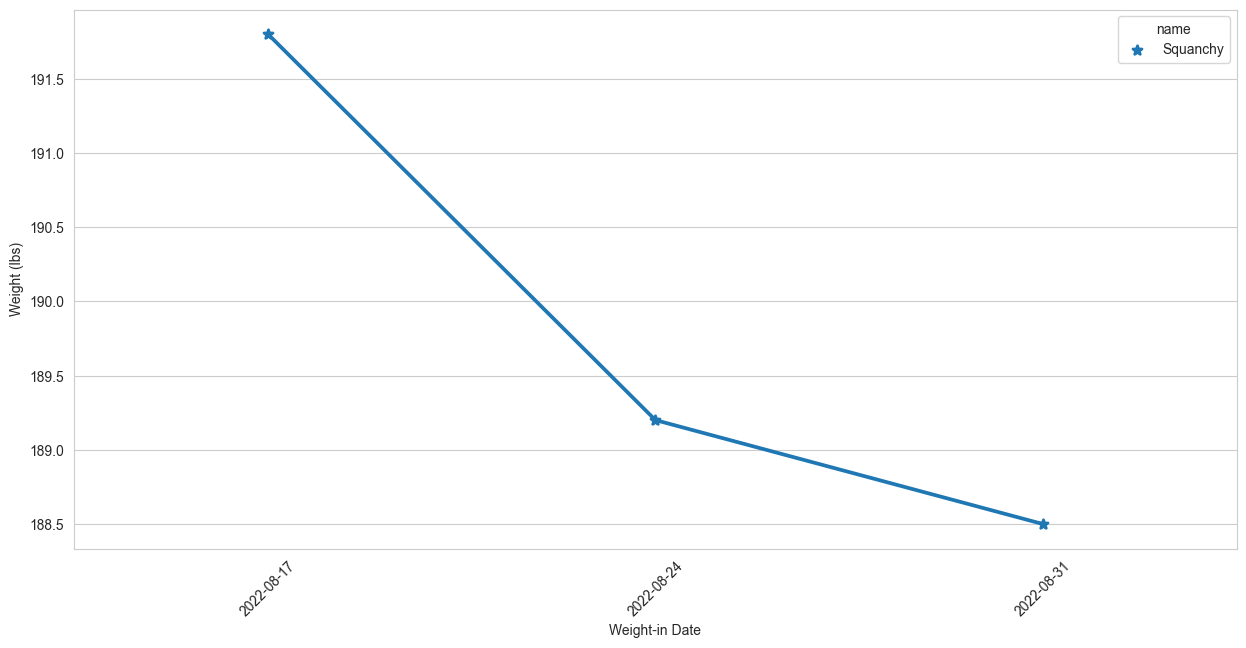

    weight units      name    weigh_in  weight_n  weekly_drop
12   191.8   lbs  Squanchy  2022-08-17     191.8        191.8
9    189.2   lbs  Squanchy  2022-08-24     189.2         -2.6
19   188.5   lbs  Squanchy  2022-08-31     188.5         -0.7
--------------------------------------------------
Total amount gained/lost: -3.3
--------------------------------------------------


In [18]:
weight_stats(df1, 'Squanchy')

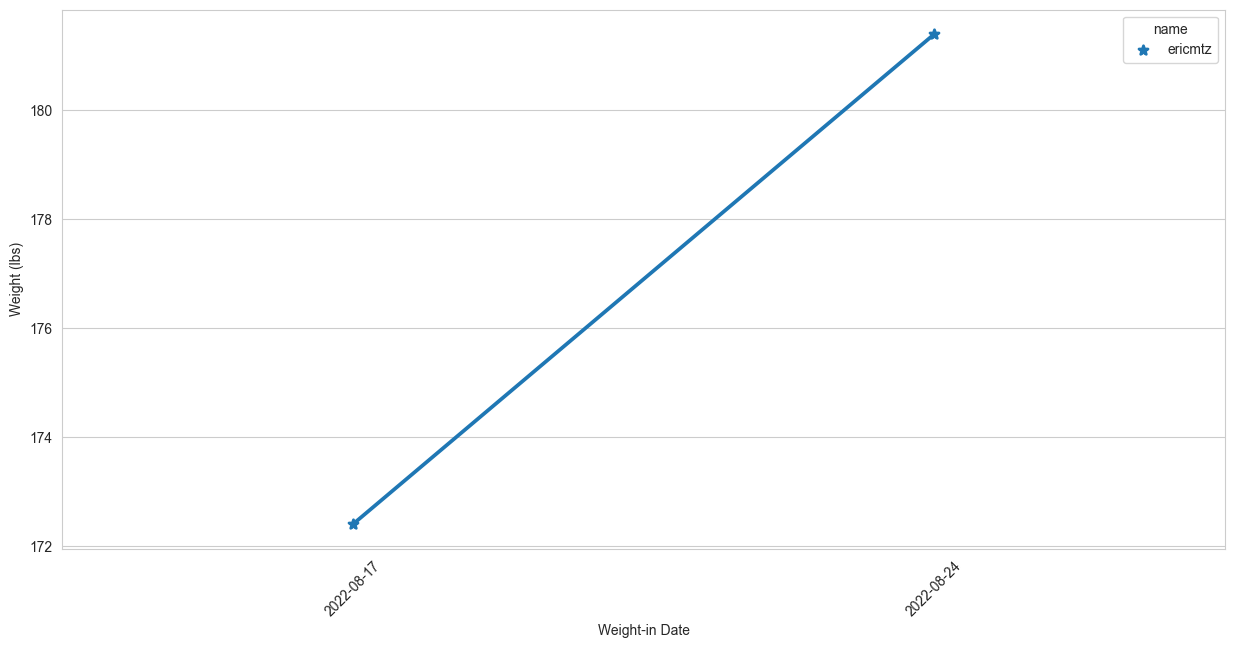

    weight units     name    weigh_in  weight_n  weekly_drop
0    172.4   lbs  ericmtz  2022-08-17     172.4        172.4
10   181.4   lbs  ericmtz  2022-08-24     181.4          9.0
--------------------------------------------------
Total amount gained/lost: 9.0
--------------------------------------------------


In [19]:
weight_stats(df1,'ericmtz')

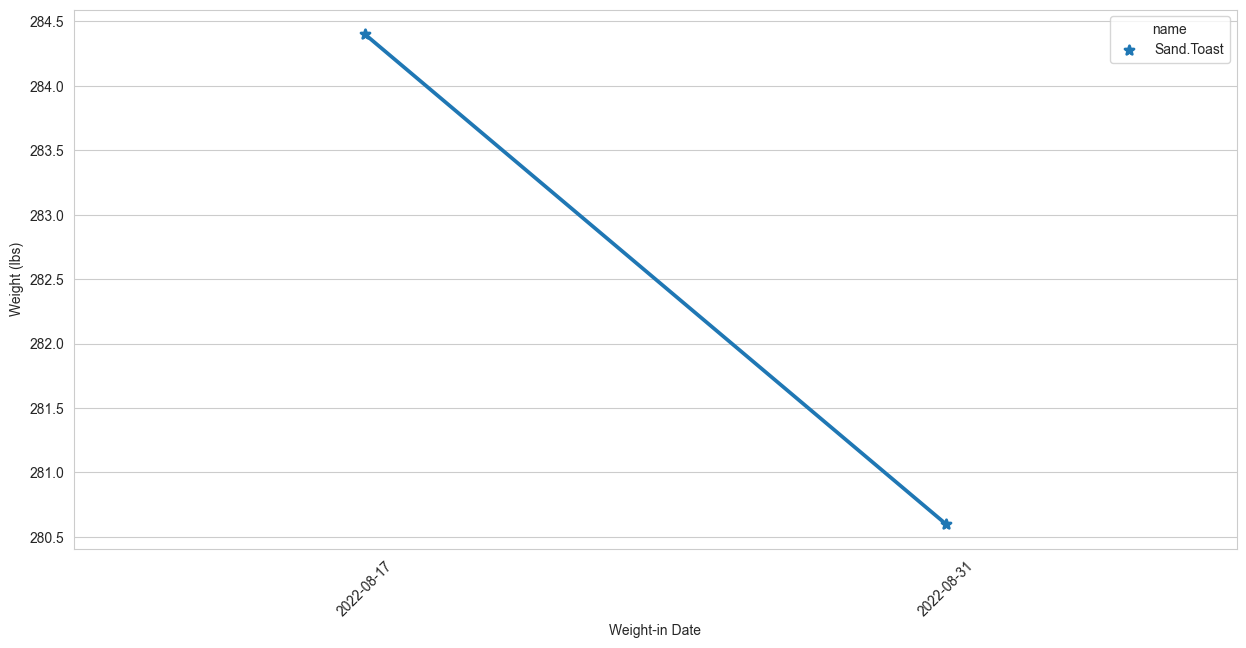

    weight units        name    weigh_in  weight_n  weekly_drop
13   284.4   lbs  Sand.Toast  2022-08-17     284.4        284.4
20   280.6        Sand.Toast  2022-08-31     280.6         -3.8
--------------------------------------------------
Total amount gained/lost: -3.8
--------------------------------------------------


In [20]:
weight_stats(df1,'Sand.Toast')

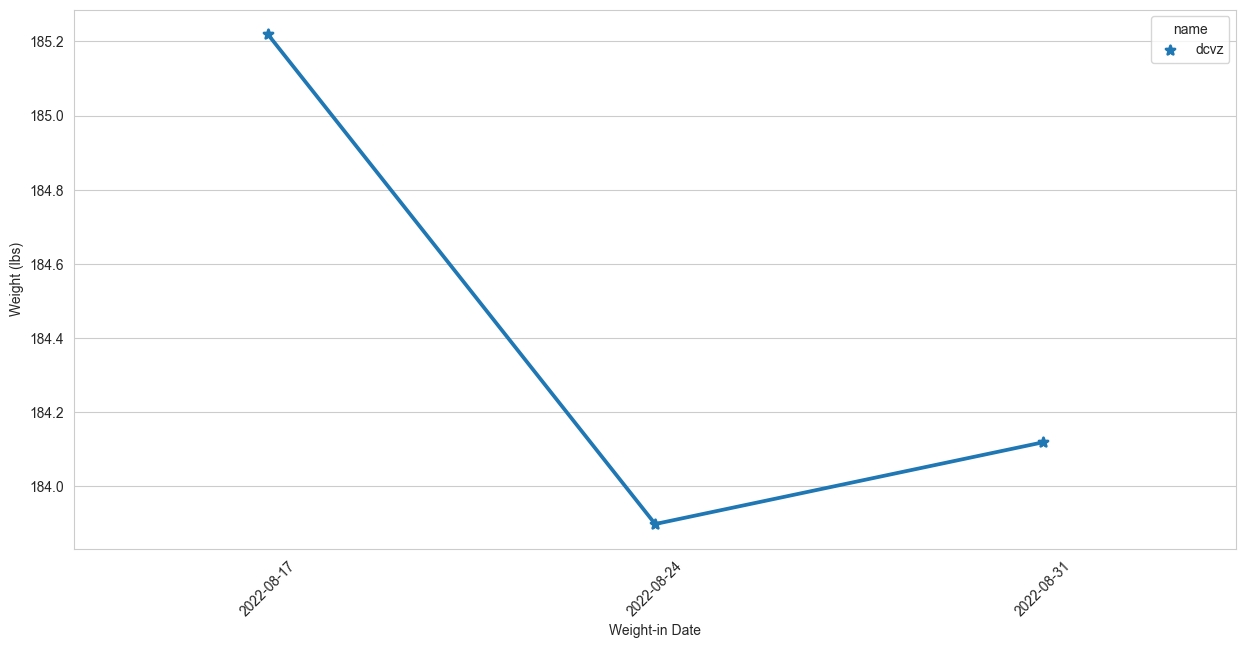

    weight units  name    weigh_in  weight_n  weekly_drop
4     84.0    kg  dcvz  2022-08-17  185.2200     185.2200
6     83.4    kg  dcvz  2022-08-24  183.8970      -1.3230
18    83.5    kg  dcvz  2022-08-31  184.1175       0.2205
--------------------------------------------------
Total amount gained/lost: -1.1
--------------------------------------------------


In [21]:
weight_stats(df1,'dcvz')

In [22]:
df1['weekly_drop'] = (df1.groupby(['weigh_in'])['weight']
                          .diff()
                          .fillna(df1['weight']))
df1

,weight,units,name,weigh_in,weight_n,weekly_drop
0,172.4,lbs,ericmtz,2022-08-17,172.4000,172.4
1,196.4,lbs,maton,2022-08-17,196.4000,24.0
2,249.4,lbs,Ludens,2022-08-17,249.4000,53.0
3,209.7,lbs,Ageeklar,2022-08-17,209.7000,-39.7
4,84.0,kg,dcvz,2022-08-17,185.2200,-125.7
5,191.0,lbs,maton,2022-08-24,191.0000,191.0
6,83.4,kg,dcvz,2022-08-24,183.8970,-107.6
7,197.2,lbs,fjjstunna,2022-08-24,197.2000,113.8
8,244.8,lbs,Ludens,2022-08-24,244.8000,47.6
9,189.2,lbs,Squanchy,2022-08-24,189.2000,-55.6


In [23]:
df_1 = df1.loc[df1['name'].eq('Squanchy')]
df_1

,weight,units,name,weigh_in,weight_n,weekly_drop
9,189.2,lbs,Squanchy,2022-08-24,189.2,-55.6
12,191.8,lbs,Squanchy,2022-08-17,191.8,107.8
19,188.5,lbs,Squanchy,2022-08-31,188.5,105.0


In [24]:
print(round(df1.mean(), 2))

weight         191.77
weight_n       206.16
weekly_drop     32.86
dtype: float64


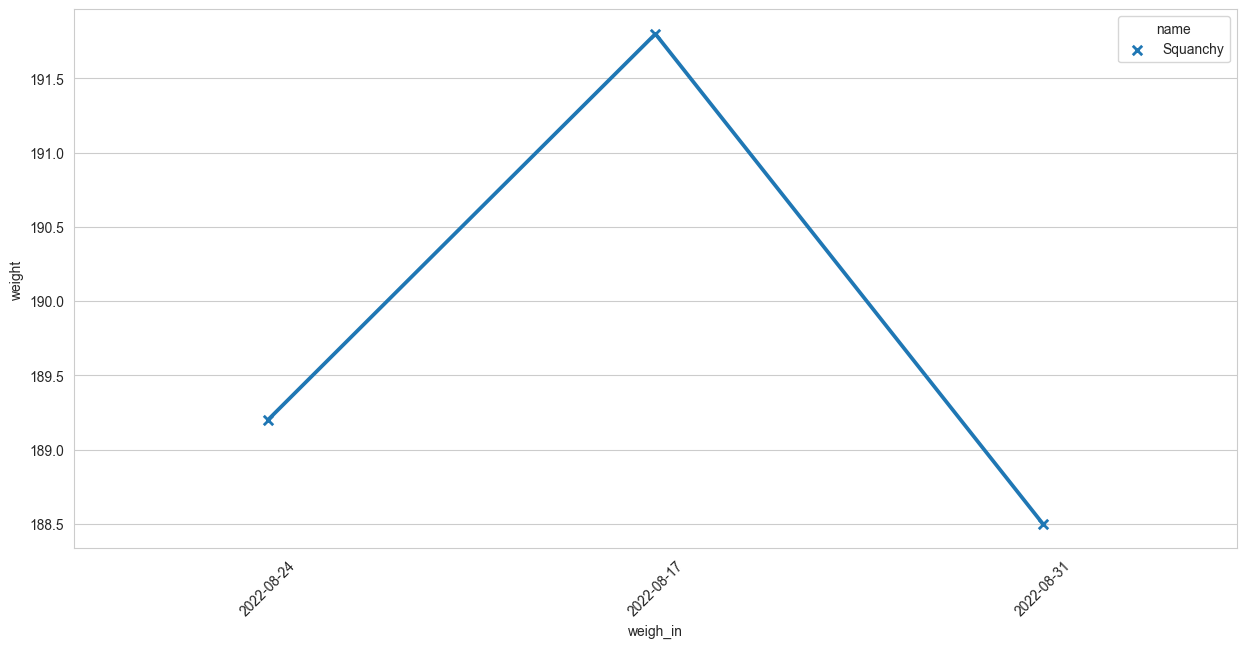

In [25]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.pointplot(x='weigh_in', y='weight', data=df_1, estimator=np.mean, markers='x', ci=None, hue='name')
plt.xticks(rotation=45)
plt.show()

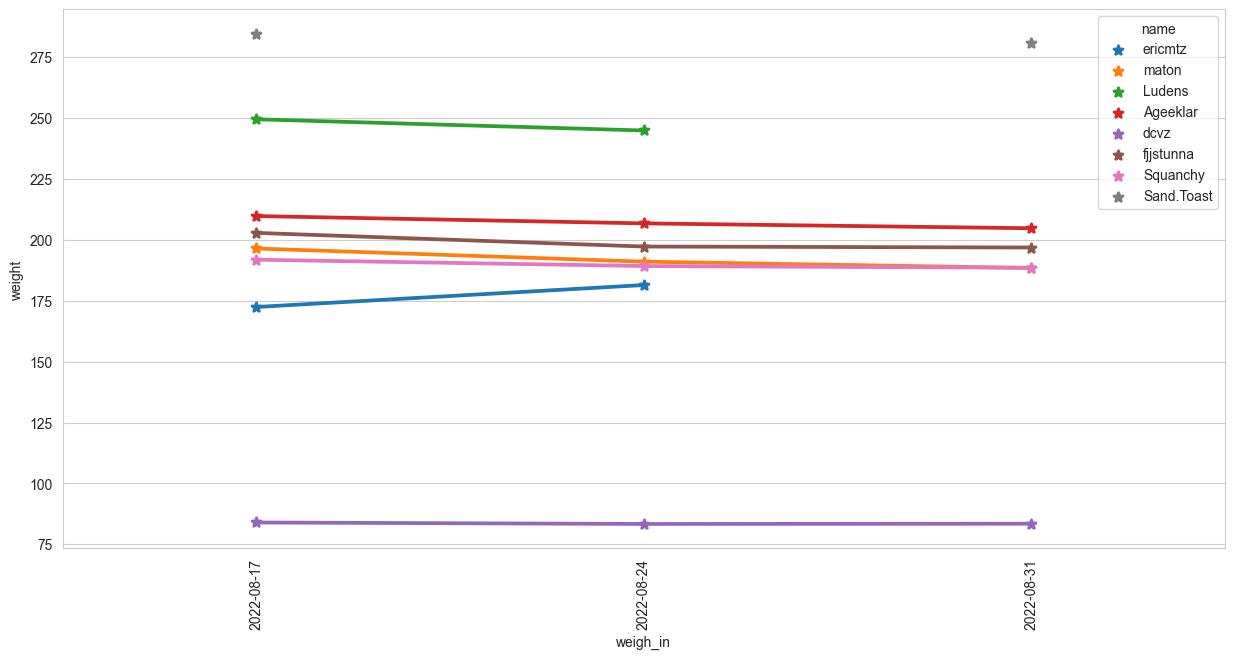

In [27]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.pointplot(x='weigh_in', y='weight', data=df1, estimator=np.mean, markers='*', ci=None, hue='name')
plt.xticks(rotation=90)
plt.show()